# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
#!wget https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
#!unzip "/content/traffic-signs-data.zip"

---
## Step 0: Load The Data

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
import keras 
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
from PIL import Image
import numpy as np
import os 
import cv2
# Load pickled data
import pickle
#i know a lot of imports xD I'll try to clean it later

# TODO: Fill this in based on where you saved the training and testing data
#colab="/content/"
training_file = "data/train.p"
validation_file= "data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

Using TensorFlow backend.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]


# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

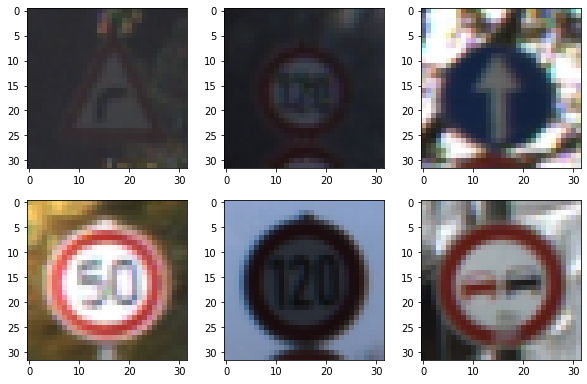

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline
# randoms images :D
random_index_list = [random.randint(0, X_train.shape[0]) for _ in range(6)]
fig = plt.figure(figsize=(10, 10))
for i, index in enumerate(random_index_list):
    a=fig.add_subplot(3,3, i+1)
    imgplot = plt.imshow(X_train[index])
    # Plot some images
plt.show()

## visualize the distribution of classes in the training, validation and test set.

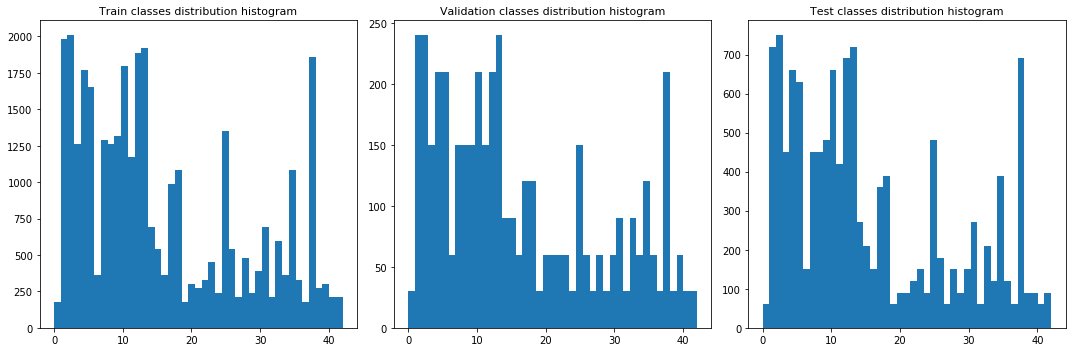

In [6]:
#number of bins is the number of classes
n_bins = n_classes

#draw a subplot table of 1x3 
fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=True, figsize=[15,5])

# We can set the number of bins with the `bins` kwarg
axs[0].set_title('Train classes distribution histogram', fontsize=11)
axs[1].set_title('Validation classes distribution histogram', fontsize=11)
axs[2].set_title('Test classes distribution histogram', fontsize=11)

x_train_hist, y_train_hist, _ = axs[0].hist(y_train, bins=n_bins)
x_valid_hist, y_valid_hist, _ = axs[1].hist(y_valid, bins=n_bins)
x_test_hist, y_test_hist, _ = axs[2].hist(y_test, bins=n_bins)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
# just normalize the data to make it have values between 0 and 1
def norm(x):
    return x/255
X_train = norm(X_train) 
X_test = norm(X_test)
X_valid = norm(X_valid)

In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

### Model Architecture

In [11]:
model = Sequential() # to initialize the model
# the first layer of the model with kernel size = (3,3), activation relu and a filter of 32  
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=image_shape))
# the second layer have a filter of 64, the same activation and kernel size 
model.add(Conv2D(64, (3, 3), activation='relu'))
# here a max pooling for take regions of the image with the size 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# the Dropout of 0.25 
model.add(Dropout(0.25))
# let's flatten
model.add(Flatten())
# a deeply connected neural network layer with a imput of 128 and a relu activation 
model.add(Dense(128, activation='relu'))
# other dropout but more higher (0.5)
model.add(Dropout(0.5))
# the last layer (dense) with imput of number of classes(43) and activation softmax for the predict probabilities 
model.add(Dense(n_classes, activation='softmax'))
# complile the model  
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [37]:
# train the model and validate 
model.fit(X_train, y_train,
          batch_size=50,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 34799 samples, validate on 12630 samples
Epoch 1/10
34799/34799 [==============================] - 164s 5ms/step - loss: 1.2465 - accuracy: 0.6575 - val_loss: 0.4011 - val_accuracy: 0.9021
Epoch 2/10
34799/34799 [==============================] - 202s 6ms/step - loss: 0.3091 - accuracy: 0.9092 - val_loss: 0.2672 - val_accuracy: 0.9308
Epoch 3/10
34799/34799 [==============================] - 180s 5ms/step - loss: 0.1811 - accuracy: 0.9482 - val_loss: 0.2184 - val_accuracy: 0.9445
Epoch 4/10
34799/34799 [==============================] - 178s 5ms/step - loss: 0.1246 - accuracy: 0.9630 - val_loss: 0.1998 - val_accuracy: 0.9511
Epoch 5/10
34799/34799 [==============================] - 179s 5ms/step - loss: 0.0969 - accuracy: 0.9707 - val_loss: 0.1862 - val_accuracy: 0.9560
Epoch 6/10
34799/34799 [==============================] - 156s 4ms/step - loss: 0.0729 - accuracy: 0.9784 - val_loss: 0.1809 - val_accuracy: 0.9557
Epoch 7/10
34799/34799 [==============================] - 161s

In [38]:
# a summary of the last model trained 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [19]:
# validating the model with the rest of the data i don't use
valid_loss, valid_acc = model.evaluate(X_valid, y_valid)

print('\nValid accuracy:', valid_acc)

4410/4410 [==============================] - 5s 1ms/sample - loss: 0.1302 - accuracy: 0.9689

Valid accuracy: 0.96893424


# Save the model


In [40]:
#model.save('cp_NW.h5') #uncoment for save and change the name 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [34]:
# Recreate the exact same model, including its weights and the optimizer
# basically load the model saved 
new_model = tf.keras.models.load_model('cp_NW.h5')

# Show the model architecture 
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

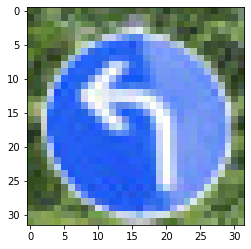

In [33]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#preprocess : applying the same thing that applies to the images of training, test and validation
img = mpimg.imread('./test_imgs/34.jpg')
img = np.array(img)
img = cv2.resize(img,(32,32))
img = norm(img)
plt.imshow(img)
img = img.reshape(1, 32, 32, 3)


### Predict 

In [54]:
# make a simple predict 
print("predict : " + str(new_model.predict_classes(img)))

predict : [34]


### confirm that the id is correct 

In [49]:
# open the csv for see if the predictin was correct 
sing_names = pd.read_csv("signnames.csv") 
sing_names

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


# yeeahh!!  
### its correct 


### Now analyze Performance

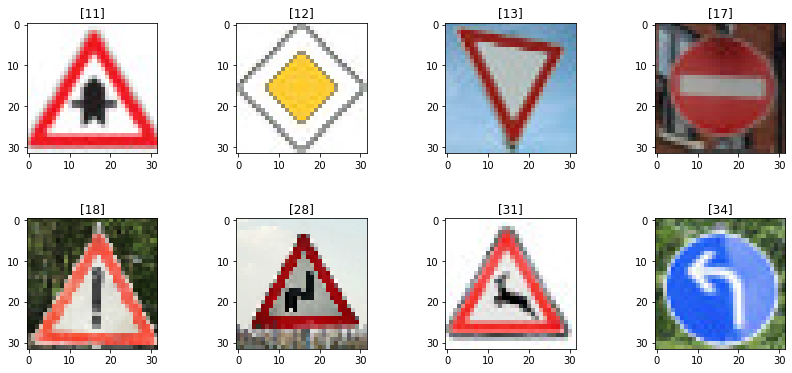

In [79]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
# plot all images in the folder test_imgs with his respective predict label  
images = glob.glob('./test_imgs/*.jpg')
collect = []
for image in images:
    img = plt.imread(image)
    collect.append(np.array(img))

fig, ax = plt.subplots(2, 4, figsize=(15,6))
fig.subplots_adjust(hspace = .5, wspace=.001)
ax = ax.ravel()
for i in range(8):
    img = collect[i]
    ax[i].imshow(img)
    img = np.array(img)
    img = cv2.resize(img,(32,32))
    img = norm(img)
    img = img.reshape(1, 32, 32, 3)
    #the predict :D
    ax[i].set_title(str(new_model.predict_classes(img)))
    

##  we could say that the precision is 87.5% in the test images from the web 
### only 1 in 8 images fail 

In [51]:
# To defend my model, we can see that the only image that fails is the Double curve where,
# due to its similarity, it is confused with Children crossing hehehehe even humans can confuse ourselves with this image

# Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [80]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
# define the top k function to preprocess, print the image and calculate the highest k probabilities 
def top_k(img,k):
    img = np.array(img)
    img = cv2.resize(img,(32,32))
    img = norm(img)
    plt.imshow(img)
    img = img.reshape(1, 32, 32, 3)
    prob = new_model.predict_proba(img)
    return (tf.math.top_k(prob,k))


TopKV2(values=<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[1.0000000e+00, 2.6340477e-10, 2.2860222e-14, 1.2322559e-16,
        4.5063192e-17]], dtype=float32)>, indices=<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[11, 30, 27, 28, 24]])>)

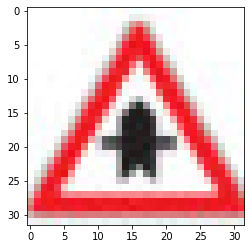

In [83]:
# the first image 
imagen = mpimg.imread('./test_imgs/11.jpg')
top_k(imagen,5)

TopKV2(values=<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[1.0000000e+00, 2.2599604e-12, 5.2970275e-13, 6.4212450e-14,
        3.7710700e-14]], dtype=float32)>, indices=<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[12, 10, 42, 14, 17]])>)

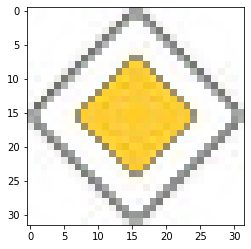

In [84]:
# as we can see we obtain the 5 highest probabilities and their 5 corresponding labels
# now let's see the other images
imagen2 = mpimg.imread('./test_imgs/12.jpg')
top_k(imagen2,5)

TopKV2(values=<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[1.0000000e+00, 1.4635544e-28, 1.2819320e-28, 3.7172938e-30,
        2.2928504e-30]], dtype=float32)>, indices=<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[13,  5, 17, 14, 12]])>)

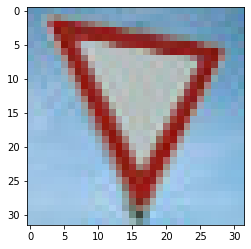

In [85]:
# the last image we obtained 1.0000000e+00 :O that is absolute security 
# lets continue with the others 
imagen3 = mpimg.imread('./test_imgs/13.jpg')
top_k(imagen3,5)

TopKV2(values=<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[9.9995506e-01, 4.4993125e-05, 5.2085892e-12, 6.7491050e-14,
        3.4231776e-14]], dtype=float32)>, indices=<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[17, 14, 13, 29,  5]])>)

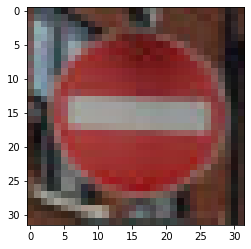

In [86]:
imagen4 = mpimg.imread('./test_imgs/17.jpg')
top_k(imagen4,5)

TopKV2(values=<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[9.9999988e-01, 7.2748854e-08, 2.9264331e-14, 1.7755503e-14,
        1.3446360e-15]], dtype=float32)>, indices=<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[18, 26, 11, 27, 25]])>)

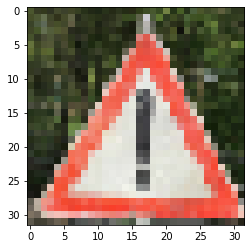

In [87]:
# in the arriva image we obtained 9.9995506e-01 almost almost 100%
imagen5 = mpimg.imread('./test_imgs/18.jpg')
top_k(imagen5,5)

TopKV2(values=<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[8.2213908e-01, 1.7689212e-01, 9.5721195e-04, 6.2347403e-06,
        5.1042634e-06]], dtype=float32)>, indices=<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[28, 20, 23, 29,  3]])>)

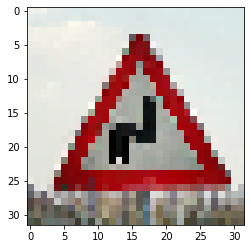

In [88]:
imagen6 = mpimg.imread('./test_imgs/21.jpg')
top_k(imagen6,5)

TopKV2(values=<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[1.0000000e+00, 2.0195991e-13, 5.4160369e-17, 1.0204965e-17,
        6.8700286e-18]], dtype=float32)>, indices=<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[31, 21, 23,  5, 25]])>)

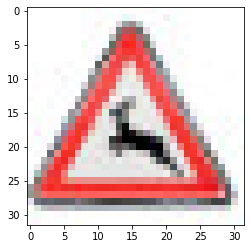

In [89]:
# unfortunately the model makes mistakes in the previous image
imagen7 = mpimg.imread('./test_imgs/31.jpg')
top_k(imagen7,5)

TopKV2(values=<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[9.9999928e-01, 7.5219805e-07, 5.4303713e-09, 4.5720345e-14,
        3.4951524e-14]], dtype=float32)>, indices=<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[34, 40, 33, 37, 38]])>)

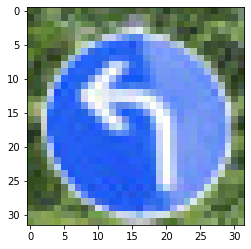

In [90]:
# the last :D 
imagen7 = mpimg.imread('./test_imgs/34.jpg')
top_k(imagen7,5)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [0]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")